
# Create a necktie plot


This example notebook demonstrates as a basic example how sphinx-nbexamples
works.


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import apace as ap

D1 = ap.Drift("D1", length=0.55)
d1 = ap.Drift("D1", length=0.55)
b1 = ap.Drift("B1", length=1.5)
b1 = ap.Dipole("B1", length=1.5, angle=0.392701, e1=0.1963505, e2=0.1963505)
q1 = ap.Quadrupole("Q1", length=0.2, k1=1.2)
q2 = ap.Quadrupole("Q2", length=0.4, k1=-1.2)
fodo_cell = ap.Lattice("FODO_CELL", [q1, d1, b1, d1, q2, d1, b1, d1, q1])
fodo_ring = ap.Lattice("FODO_RING", [fodo_cell] * 8)

In [2]:
n_steps = 100
k1_start = 0
k1_end = 2

q1_values = np.linspace(k1_start, k1_end, n_steps)
q2_values = np.linspace(k1_start, -k1_end, n_steps)
stable = np.empty((n_steps, n_steps), dtype=bool)

twiss = ap.Twiss(fodo_ring)

for i, q1.k1 in enumerate(q1_values):
    for j, q2.k1  in enumerate(q2_values):
        stable[i, j] = twiss.stable

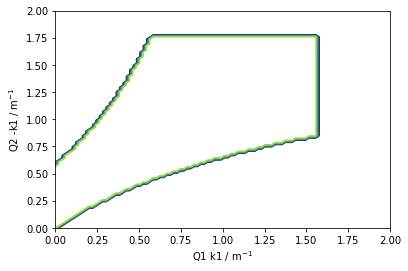

In [3]:
x, y = np.meshgrid(q1_values, -q2_values)
CS = plt.contour(x, y, stable)
plt.xlabel(f'{q1.name} k1 / m$^{{-1}}$')
plt.ylabel(f'{q2.name} -k1 / m$^{{-1}}$')
plt.show()

In [57]:
# TODO change Bend to Drift -> changes necktieplot to center